In [1]:
%matplotlib inline

<h1>Design criteria</h1>

In this demo, we look at some different design criteria from literature. The analytical approach to design of experiments for model discrimination maximises is to find the optimal next experiment by maximising a design criterion. The design criterion is typically a divergence measure between the marginal predictive distributions of the models.

In the GPdoemd package there are (at the time of writing this demo) five different design criteria implemented.

<table>
  <col width="80">
  <col width="400">
  <tr>
    <th>Symbol</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td>$M$</td>
    <td>Number of competing models</td>
  </tr>
  <tr>
    <td>$\boldsymbol x$</td>
    <td>Experimental design</td>
  </tr>
  <tr>
    <td>$\hat{\boldsymbol \theta}_i$</td>
    <td>Best-fit model parameter values for model $i$</td>
  </tr>
  <tr>
    <td>$D_i$</td>
    <td>Number of model parameters for model $i$</td>
  </tr>
  <tr>
    <td>$\boldsymbol \Sigma$</td>
    <td>Measurement noise covariance</td>
  </tr>
  <tr>
    <td>$\boldsymbol f_i = f_i (\boldsymbol x; \hat{\boldsymbol \theta}_i)$</td>
    <td>Prediction of model $i$ for design $\boldsymbol x$, given parameters $\hat{\boldsymbol \theta}_i$</td>
  </tr>
  <tr>
    <td>$\boldsymbol \Sigma_i$</td>
    <td>$\boldsymbol \Sigma$ + covariance of model $i$'s marginal predictive distribution at $\boldsymbol x$</td>
  </tr>
  <tr>
    <td>$\Delta_{ij}$</td>
    <td>$\boldsymbol f_{i} - \boldsymbol f_{j}$</td>
  </tr>
  <tr>
    <td>$\tilde{\boldsymbol f}_{ij}$</td>
    <td>$\boldsymbol \Sigma_{i}^{-1} \boldsymbol f_i + \boldsymbol \Sigma_{j}^{-1} \boldsymbol f_j$</td>
  </tr>
  <tr>
    <td>$\boldsymbol \Sigma_{ij}$</td>
    <td>$\boldsymbol \Sigma_{i} + \boldsymbol \Sigma_{j}$</td>
  </tr>
  <tr>
    <td>$p(\mathcal{M}_i)$</td>
    <td>Prior for model $i$ being the "true"/data-generating model</td>
  </tr>
  <tr>
    <td>$p(\mathcal{M}_i\,|\,\mathcal{D})$</td>
    <td>Probability of model $i$ being the "true" model given data $\mathcal{D}$</td>
  </tr>
  <tr>
    <td>$\pi_i$</td>
    <td>$\left. p(\mathcal{M}_i\,|\,\mathcal{D}) \, \middle/ \, \sum_{i=1}^M p(\mathcal{M}_j\,|\,\mathcal{D}) \right.$</td>
  </tr>
</table>

<h5>Hunter and Reiner (1965)</h5>
Designs for discriminating between two rival models. <i>Technometrics</i> 7(3):307-323.
$$ D_\mathrm{HR} (\boldsymbol x) = \sum_{i=1}^{M-1} \sum_{j=i+1}^M \Delta_{ij} \,.$$

<h5>Box and Hill (1967) / Prasad and Someswara Rao (1977)</h5>
Discrimination among mechanistic models. <i>Technometrics</i> 9(1):57-71. / Use of expected likelihood in sequential model discrimination in multiresponse systems. <i>Chem Eng Sci</i> 32:1411-1418.
$$ D_\mathrm{BH}(\boldsymbol x) = \tfrac{1}{2} \sum_{i=1}^{M-1} \sum_{j=i+1}^M \pi_i \pi_j \left\lbrace \mathrm{trace} \left( \boldsymbol \Sigma_i \boldsymbol \Sigma_j^{-1} + \boldsymbol \Sigma_j \boldsymbol \Sigma_i^{-1} - 2 \boldsymbol I \right) + \Delta_{ij}^\top \left( \boldsymbol \Sigma_j^{-1} + \boldsymbol \Sigma_i^{-1} \right) \Delta_{ij} \right\rbrace \,.$$

<h5>Buzzi-Ferraris et al. (1990)</h5>
An improved version of sequential design criterion for discrimination among rival multiresponse models. <i>Chem Eng Sci</i> 45(2):477-481.
$$ D_\mathrm{BF} (\boldsymbol x) = \sum_{i=1}^{M-1} \sum_{j=i+1}^M \left\lbrace \mathrm{trace} \left(2 \boldsymbol \Sigma \boldsymbol \Sigma_{ij}^{-1} \right) + \Delta_{ij}^\top \boldsymbol \Sigma_{ij}^{-1} \Delta_{ij} \right\rbrace \,.$$

<h5>Michalik et al. (2010)</h5>
Optimal experimental design for discriminating numerous model candidates: the AWDC criterion. <i>Ind Eng Chem Res</i> 49:913-919.
$$ D_\mathrm{AW} (\boldsymbol x) = \sum_{i=1}^M \frac{p(\mathcal{M}_i)}{ \sum_{j=1}^M \exp \left( \frac{-1}{2} \Delta_{ij}^\top \boldsymbol \Sigma_{i}^{-1} \Delta_{ij} + D_i - D_j \right) } \,.$$

<h5>Jensen-Rényi divergence</h5>
Olofsson et al. (Future publication).
$$ D_\mathrm{JR}(\boldsymbol x) = \sum_{i=1}^M \pi_i \log \sqrt{ \frac{ |\boldsymbol \Sigma_{i}^{-1}(\boldsymbol x)|^2 }{(2\pi)^E|2 \boldsymbol \Sigma_{i}^{-1}(\boldsymbol x)|}} - \log \sum_{i=1}^M \sum_{j=1}^M \frac{\pi_i \pi_j}{(2\pi)^{E/2}} \exp \left( - \frac{1}{2} \phi_{ij}(\boldsymbol x)  \right) \,,$$
where 
$$ \phi_{ij} (\boldsymbol x) = \boldsymbol f_{i}^\top \boldsymbol \Sigma_{i}^{-1} \boldsymbol f_{i} + \boldsymbol f_{j}^\top \boldsymbol \Sigma_{j}^{-1} \boldsymbol f_{j} - \tilde{\boldsymbol f}_{ij}^\top \left(\boldsymbol \Sigma_{i}^{-1} + \boldsymbol \Sigma_{j}^{-1} \right)^{-1} \tilde{\boldsymbol f}_{ij} - \log \frac{ \left|\boldsymbol \Sigma_{i\phantom{j}}^{-1}\right|\left|\boldsymbol \Sigma_{j}^{-1}\right| }{\left|\boldsymbol \Sigma_{i}^{-1} + \boldsymbol \Sigma_{j}^{-1}\right|} \,.$$
Note that $\phi_{ii} (\boldsymbol x) = \log|2 \boldsymbol \Sigma_{i}^{-1}|- \log(|\boldsymbol \Sigma_{i}^{-1}|^2)$.

<h1>Example</h1>

Assume we have two functions that take a single input $x \in [-2,\,2]$ and outputs $\boldsymbol f_i = [f_{i,(1)},\, f_{i,(2)}]^\top \in \mathbb{R}^2$.

We have the expressions for their predictive distributions  $\boldsymbol f_i \sim \mathcal{N}(\boldsymbol \mu_i(\boldsymbol x),\,\boldsymbol \Sigma_i(\boldsymbol x))$, given by:

In [2]:
import numpy as np

def M1 (x): # Model 1
    mu = np.array([  0.1 * x + 0.1 * x**2, 
                    -0.1 * x + 0.1 * np.sin(x**2) ])
    s2 = np.array([[ 0.7*(0.01 + mu[0]**2), 0 ],
                   [ 0, 0.7*(0.01 + mu[1]**2) ] ])
    return mu, s2

def M2 (x): # Model 2
    mu = np.array([  0.1 * x + 0.1 * x**2 + 0.2 * np.sin(0.2 * x**3), 
                    -0.1 * x + 0.1 * np.cos(x**2) ])
    s2 = np.array([[ 0.7 * (0.01 + mu[0]**2), 0 ],
                   [ 0, 0.7 * (0.01 + mu[1]**2) ] ])
    return mu, s2

We assume the measurement noise covariance is $\boldsymbol \Sigma = \begin{bmatrix} 0.04 & 0 \\ 0 & 0.01 \end{bmatrix}$

In [3]:
measvar = np.array([0.04, 0.01])

We compute the mean and covariance of the predictive distributions at a set of test points.

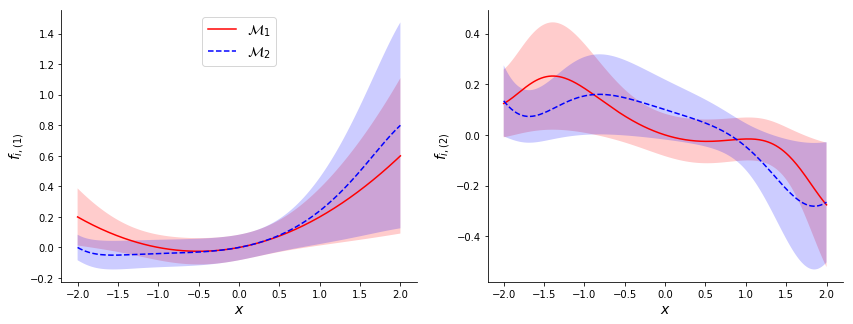

In [4]:
from demo_utils.design_criteria_graphics import Graphics
graphics = Graphics()

E = 2                          # Number of output dimensions
X = np.linspace(-2., 2., 250)  # Test points
M = np.zeros((250, 2, E))      # Means
S = np.zeros((250, 2, E, E))   # Covariances

for i, x in enumerate(X):
    M[i,0] = M1(x)[0]  # Mean, model 1
    S[i,0] = M1(x)[1]  # Covariance, model 1
    M[i,1] = M2(x)[0]  # Mean, model 2
    S[i,1] = M2(x)[1]  # Covariance, model 2

graphics.plot_predictions(X, M, S)

Now we compute the design criteria for these predictive distributions.

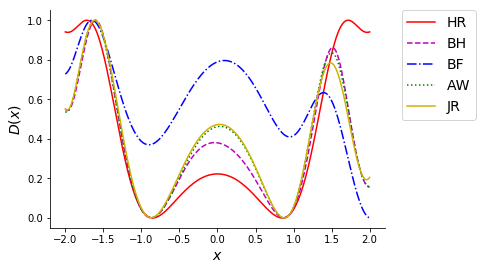

In [5]:
from GPdoemd.design_criteria import HR, BH, BF, AW, JR

dcs = []
for D in [HR, BH, BF, AW, JR]: 
    dc = D( M, S, measvar )
    dcs.append(dc)
    
graphics.plot_designs(X, dcs)

The optimal next experiment is chosen by maximising a design criterion.